In [14]:
# Install dependencies
%matplotlib inline
import matplotlib.pylab as plt #Combines both Pyplot and Numpy in the same namespace **discouraged 
import matplotlib.image as mpimg
import numpy as np

# Scikit-Image
from skimage import viewer
import skimage.io as skio
import os


#Pillow
from PIL import Image
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat

In [15]:
# Upsampling and interpolation
# Convert sklearn image to PI
# Increase the size of an image and interpolate what the new pixels should be based on mathematical equations
im = Image.open("./images/processed/pngs/d1tnc1_fish.png")
# im.show()
print(im.width, im.height, im.mode, im.format)


960 720 RGBA PNG


In [16]:

width, height = im.size

left = 150
top = 450
right = 200
bottom = 500

im1 = im.crop((left, top, right, bottom))
im1.save("./images/processed/d1tnc1_crop.png")
# Shows the image in image viewer
im1.show()


In [17]:
##  Upsampling and Interpolation
# im2 = im1.resize((im1.width * 5, im1.height * 5),Image.BILINEAR).save("./images/processed/d1tnc1_up_biline.png")
# im3 = im1.resize((im1.width * 5, im1.height * 5), Image.BICUBIC).save("./images/processed/d1tnc1_up_bilcube.png")
# im4 = im1.resize((im1.width * 5, im1.height * 5), Image.BOX).save("./images/processed/d1tnc1_up_box.png")
# im5 = im1.resize((im1.width * 5, im1.height * 5), Image.HAMMING).save("./images/processed/d1tnc1_up_ham.png")
# im6 = im1.resize((im1.width * 5, im1.height * 5), Image.LANCZOS).save("./images/processed/d1tnc1_up_lanc.png")
# huge = im1.resize((im1.width * 50, im1.height * 50), Image.BICUBIC).save("./images/processed/d1tnc1_HUGE.png")

## Downsampling
# im8 = huge.resize((huge.width // 10, huge.height // 10)).save("./images/processed/d1tnc1_down.png")
# im7 = huge.resize((huge.width // 10, huge.height// 10), Image.ANTIALIAS).save("./images/processed/d1tnc1_down_antialias.png")



In [18]:
# Compute the diference between the two downsampled images with the original image
from PIL.ImageChops import difference

(-0.5, 249.5, 249.5, -0.5)

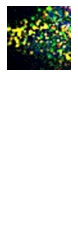

In [19]:
original = Image.open("./images/processed/d1tnc1_up_bilcube.png")
down = Image.open("./images/processed/d1tnc1_down.png")
down_alias = Image.open("./images/processed/d1tnc1_down_antialias.png")

im_down = difference(original, down)
im_down_anti = difference(original, down_alias)

plt.subplot(311)
plt.imshow(original)
plt.axis("off")
plt.subplot(312)
plt.imshow(im_down)
plt.axis("off")
plt.subplot(313)
plt.imshow(im_down_anti)
plt.axis("off")


# Quantiziation
- Intensity of an image = number of bits per pixel
- As bits/pixel **decreases** --> quantization error **increases** == aritifical boundaries or contours, pixelating, low-quality image

In [24]:
from scipy.stats import norm

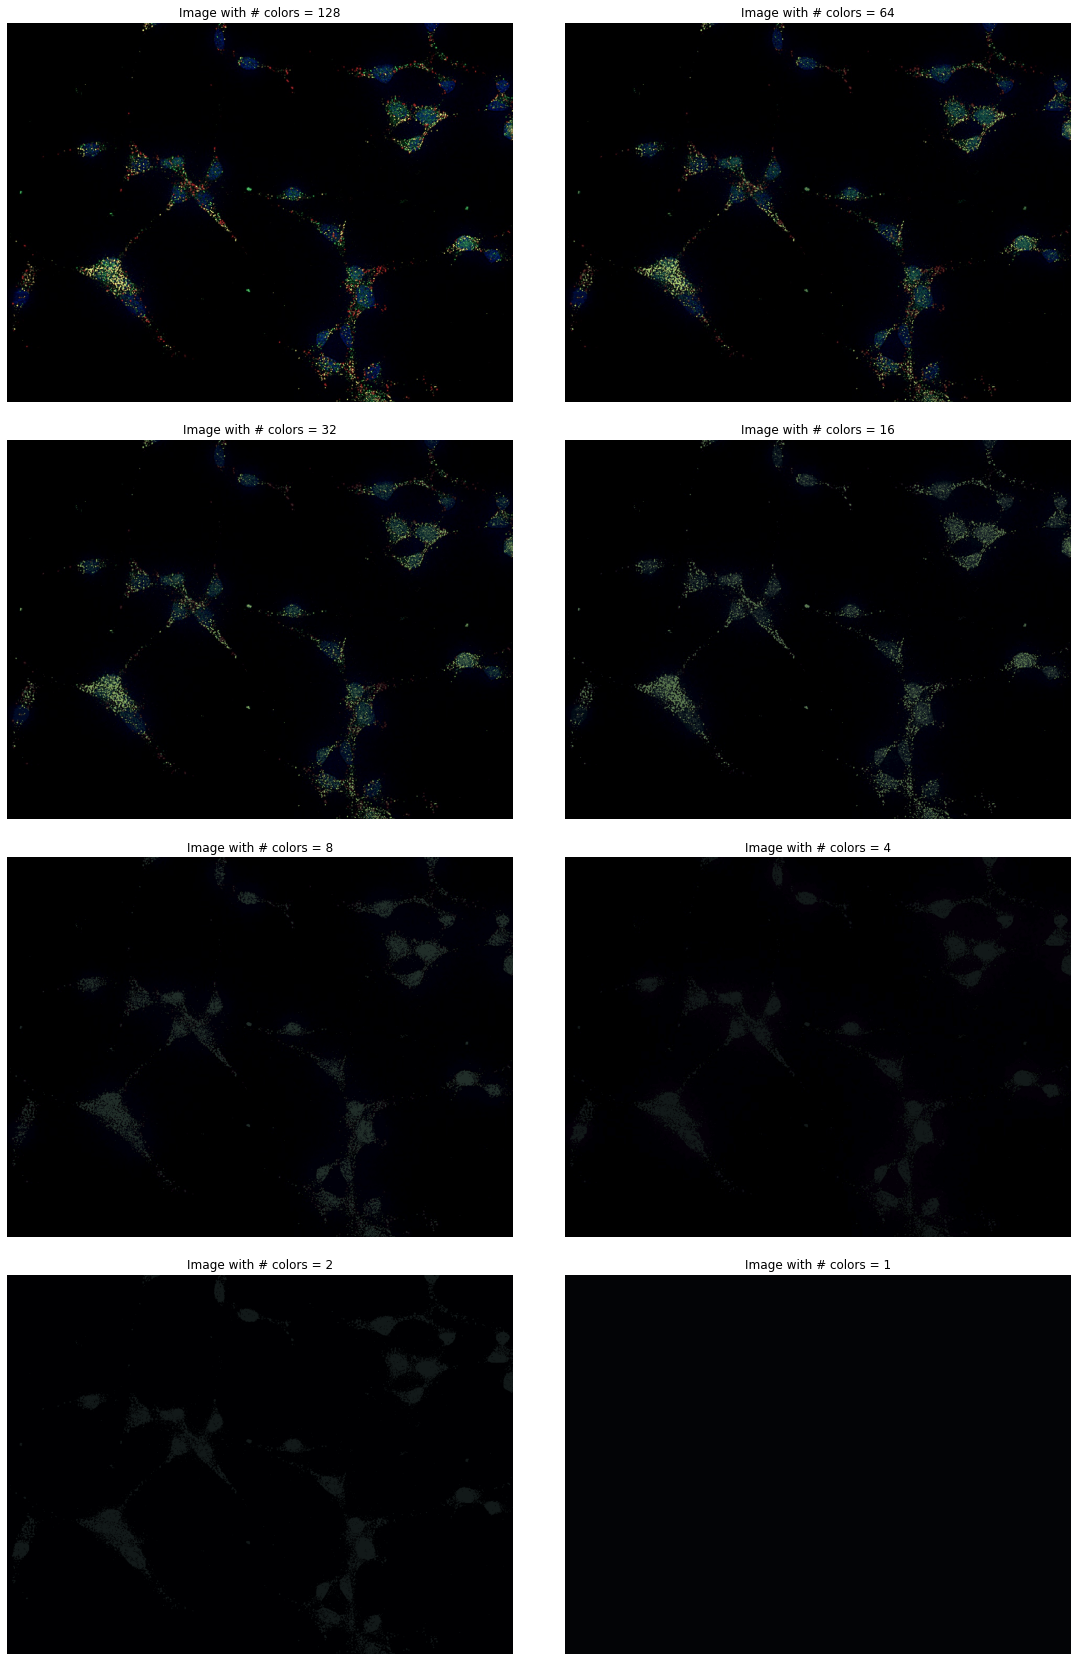

In [32]:
im = Image.open("./images/processed/jpgs/d1tnc1_fish.jpg")
plt.figure(figsize=(20,30))
num_colors_list =[1 << n for n in range (7,-1,-1)]
i = 1
for num_colors in num_colors_list:
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors = num_colors)
    plt.subplot(4,2,i)
    plt.imshow(im1)
    plt.axis("off")
    plt.title("Image with # colors = " + str(num_colors))
    i += 1
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()
